# Импорт библиотек

In [227]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('World-happiness-report-2024.csv')

# Очистка данных

In [228]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


Датасет содержит данные об индексе счастья в различных странах мира наряду со следующей информацией о них:
* Название
* Регион
* Оценка счастья на основе опроса
* Верхняя и нижняя граница оценки
* Логарифм ВВП на душу населения
* Поддержка со стороны близких
* Количество лет жизни без проблем со здоровьем
* Свобода жизненного выбора
* Щедрость
* Ощущаемая коррупция
* Положение относительно самого несчастливого теоретического варианта (дистопии)

Название страны и региона в исследовании не пригодятся, как и границы оценки счастья. Избавимся от данных столбцов.

In [229]:
df.drop(['Country name', 'Regional indicator', 'upperwhisker', 'lowerwhisker'], axis=1, inplace=True)

In [230]:
df

,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...
138,3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


Теперь у нас остались только числовые предикторы. Проверим наличие пропусков.

In [231]:
df.isnull().sum()

Ladder score                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

Их всего 3 на весь датасет, поэтому можно спокойно от них избавиться.

In [232]:
df.dropna(inplace=True)

In [233]:
df

,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...
138,3.295,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,3.245,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,3.186,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


Для дальнейшего удобства переименуем столбцы.

In [234]:
df.rename(columns={'Ladder score': 'score', 'Log GDP per capita': 'gdp', 'Social support': 'social_support', 'Healthy life expectancy': 'expectancy', 'Freedom to make life choices': 'freedom', 'Generosity': 'generosity', 'Perceptions of corruption': 'corruption', 'Dystopia + residual': 'dystopia'}, inplace=True)

Проверим каждый признак на наличие выбросов.

In [235]:
df.columns

Index(['score', 'gdp', 'social_support', 'expectancy', 'freedom', 'generosity',
       'corruption', 'dystopia'],
      dtype='object')

In [236]:
from scipy.stats import zscore

In [237]:
zscore(df).describe()

,score,gdp,social_support,expectancy,freedom,generosity,corruption,dystopia
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,-4.567775e-16,-5.075305e-17,2.537653e-16,5.075305e-17,1.522592e-16,-1.268826e-16,2.283887e-16,-2.030122e-16
std,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00
min,-3.236896e+00,-3.255148e+00,-3.415371e+00,-3.169707e+00,-3.833115e+00,-1.998830e+00,-1.225262e+00,-3.079000e+00
25%,-7.639143e-01,-7.107488e-01,-6.400567e-01,-7.477872e-01,-5.751416e-01,-7.552957e-01,-6.787009e-01,-4.998067e-01
50%,2.290590e-01,1.243996e-01,3.106408e-01,1.741244e-01,1.258632e-01,-1.335286e-01,-2.672896e-01,1.280694e-01
75%,7.606980e-01,8.562611e-01,7.494821e-01,7.765616e-01,7.126073e-01,6.317231e-01,3.150462e-01,5.710838e-01
max,1.877713e+00,1.799418e+00,1.453284e+00,2.045331e+00,1.496992e+00,3.480919e+00,3.345975e+00,2.655446e+00


Видно, что почти в каждом столбце есть элементы с z-score больше 3 по модулю. Посмотрим, насколько их много.

In [238]:
for column in df.columns:
    print(column, len(df[abs(zscore(df.score)) > 3]))

score 1
gdp 1
social_support 1
expectancy 1
freedom 1
generosity 1
corruption 1
dystopia 1


Очевидно, что их количество совсем невелико, поэтому строки с такими значениями можно отбросить без особых потерь в данных.

In [239]:
df = df[abs(zscore(df)) <= 3].dropna()

Взглянем на корреляционную матрицу.

<Axes: >

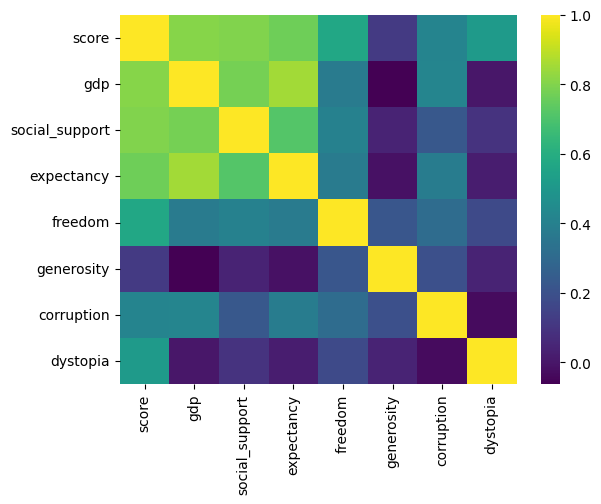

In [240]:
sns.heatmap(df.corr(), cmap='viridis')

Признаки generosity, corruption и dystopia слабо коррелируют со всеми остальными признаками, поэтому для выявления тенденций они будут не слишком полезны. Уберем данные столбцы из рассмотрения.

In [241]:
df.drop(['generosity', 'dystopia', 'corruption'], axis=1, inplace=True)

In [242]:
df

,score,gdp,social_support,expectancy,freedom
2,7.525,1.881,1.617,0.718,0.819
3,7.344,1.878,1.501,0.724,0.838
4,7.341,1.803,1.513,0.740,0.641
5,7.319,1.901,1.462,0.706,0.725
6,7.302,1.952,1.517,0.704,0.835
...,...,...,...,...,...
135,3.421,0.617,0.410,0.349,0.571
136,3.383,1.445,0.969,0.241,0.567
137,3.341,0.748,0.850,0.232,0.487
138,3.295,0.534,0.665,0.262,0.473


Теперь данные выглядят опрятно, ровно и мы можем приступать к моделированию.

# Построение и обучение модели

Будем решать задачу регрессии с целью предсказания индекса счастья на основании предложенных признаков. Используем линейную регрессию, обученную на тренировочной и проверенную на тестовой выборках. В качестве метрик задействуем r2_score и MSE.

In [243]:
x = df.drop('score', axis=1)
y = df.score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
lin = LinearRegression()
lin.fit(x_train, y_train)
lin.score(x_train, y_train)

0.7858244345095986

In [244]:
mean_squared_error(y_test, lin.predict(x_test))

0.24120964891673097

Метрики показали относительно хороший результат. Взглянем на pairplot и еще раз убедимся, что некоторая линейная зависимость в данных присутствует.

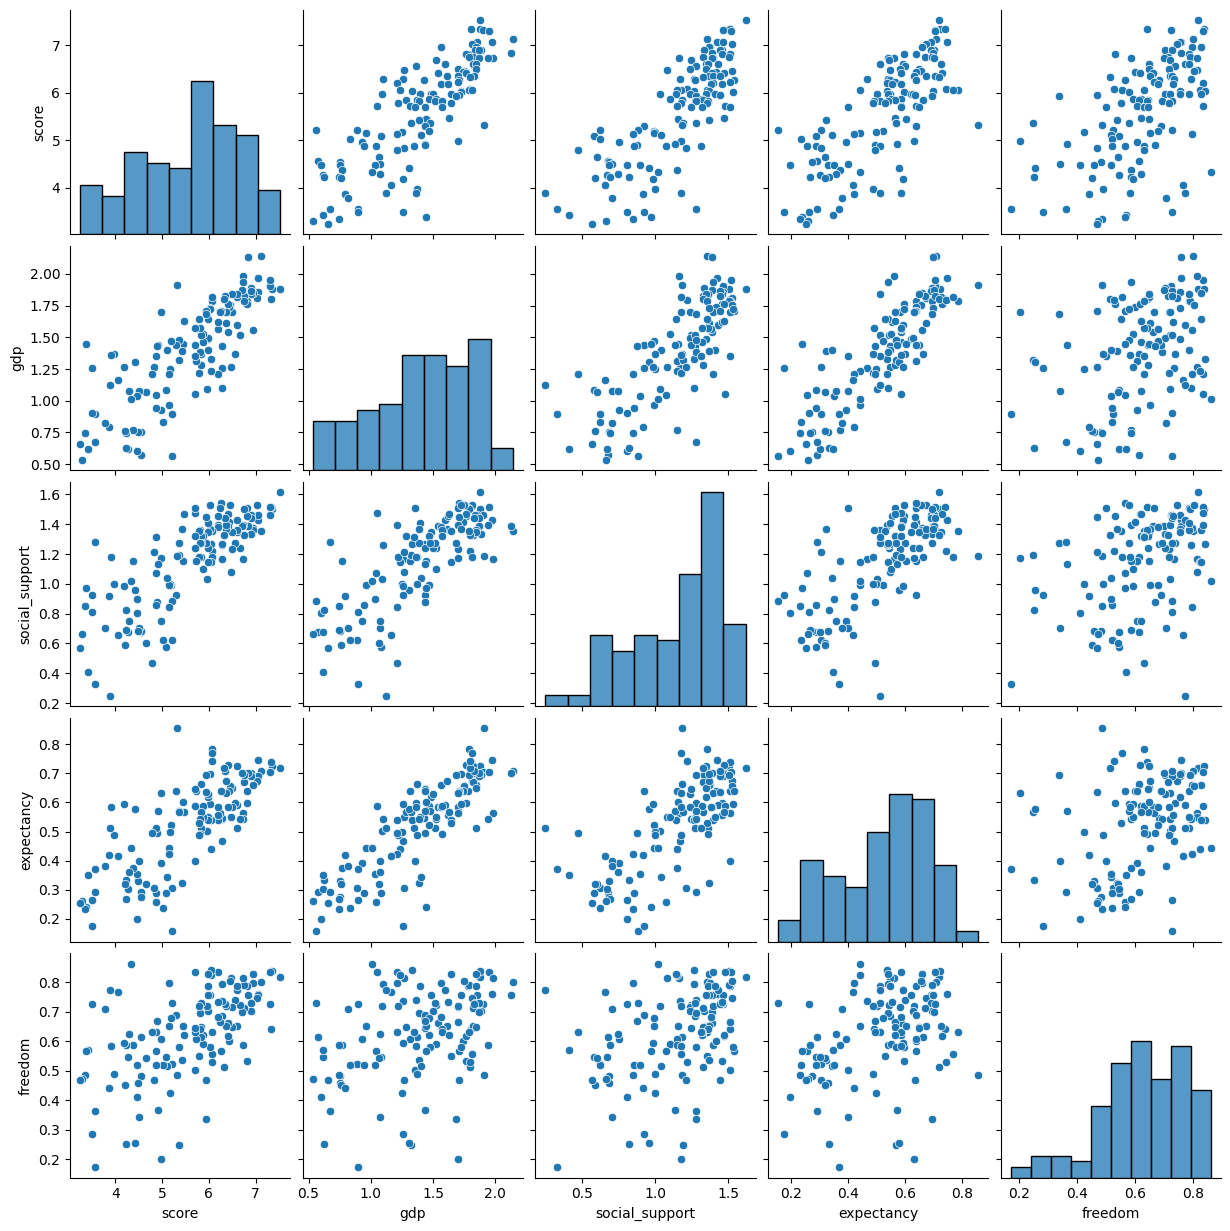

In [245]:
sns.pairplot(df)

По итогу мы имеем относительно точную модель для вычисления индекса счастья отдельно взятой страны по заданным параметрам.